In [1]:

import pandas as pd

In [5]:
import pandas as pd
train=pd.read_csv('/root/hackerday/15_predict_big_mart_sales/Train_UWu5bXk.csv')
train.head()

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
import seaborn as sns  ## visulazation package
import matplotlib.pyplot as plt  ## visulazation package
%matplotlib inline  ## to get plot on python notebook
#sns.lmplot('Item_Weight','Item_Outlet_Sales',data=train)

UsageError: unrecognized arguments: ## to get plot on python notebook

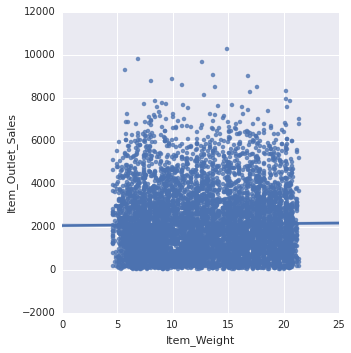

In [17]:
sns.lmplot("Item_Weight", "Item_Outlet_Sales", data=train) ## scatter plot between sales and weight
plt.show()

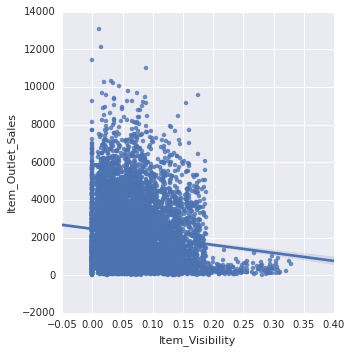

In [18]:
sns.lmplot("Item_Visibility", "Item_Outlet_Sales", data=train) ## scatter plot between sales and weight
plt.show()

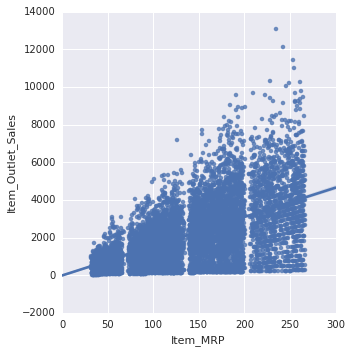

In [19]:
sns.lmplot("Item_MRP", "Item_Outlet_Sales", data=train) ## scatter plot between sales and weight
plt.show()

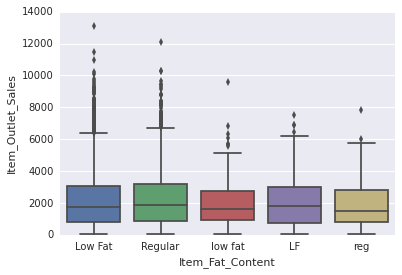

In [21]:
sns.boxplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)

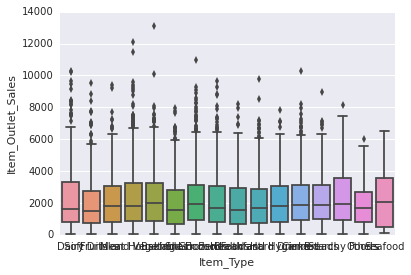

In [22]:
sns.boxplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

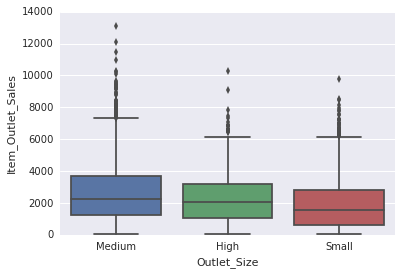

In [23]:
sns.boxplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

In [24]:
## Data preparation..
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
#train.Item_Weight##
sum(train['Item_Weight'].isnull())  ## to check total missing values
sum(train['Item_Visibility'].isnull())  ## to check total missing values

0

In [33]:
train.apply(lambda x :sum(x.isnull())) ## (  1st - name of df then apply inside it function)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
## Impute the missing values ## function to be used is fillna()
train['Item_Weight'].fillna(12.6,inplace=True)  ## missing is replaced by 12.6
train['Outlet_Size'].value_counts()## value_counts to get the freq
train['Outlet_Size'].fillna('Medium',inplace=True)
train.apply(lambda x :sum(x.isnull())) ## (  1st - name of df then apply inside it function)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
from sklearn import preprocessing  ## sklern is ML library-- preprocessing 
encoding=preprocessing.LabelEncoder() ## create label encoding object
train['Item_Fat_Content'] = encoding.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoding.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoding.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoding.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoding.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoding.fit_transform(train['Outlet_Type'])

In [44]:
train.head(3)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


In [56]:
## Building a Linear Model
#X_train=train[features] ## 
#y_train=train['Item_Outlet_Sales']  ##

from sklearn import cross_validation  ## 
#features=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier',
 #        'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Typ','Outlet_Type']
features=['Item_Weight','Item_Visibility','Outlet_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size','Outlet_Location_Type','Outlet_Type']  ## list of features
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train[features],train['Item_Outlet_Sales'], test_size=0.3, random_state=0)


In [67]:
### use Linear Model for regression
from sklearn import linear_model
from sklearn import cross_validation  ## 
features=['Item_Weight','Item_Visibility','Outlet_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size','Outlet_Location_Type','Outlet_Type']  ## list of features
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train[features],train['Item_Outlet_Sales'], test_size=0.3, random_state=0)

regr = linear_model.LinearRegression() ### Create linear regression object
regr.fit(X_train, y_train) ## fit train/fit the model
regr.score(X_test, y_test)  ### check the accuracy on test set
scores = cross_validation.cross_val_score(regr, train[features],train['Item_Outlet_Sales'], cv=5) ##scoring='mean_squared_error'
scores


array([ 0.52804868,  0.50523583,  0.48905649,  0.50921545,  0.50899239])

In [65]:
pred=regr.predict(X_test) ## predict the sales / target variable on new dataset
pred

array([ 2485.23692549,  2487.87928871,  1824.63453616, ...,  2307.22374521,
        2151.90489933,  2353.40609424])

In [68]:
### Decision Tree model
from sklearn import tree
DT = tree.DecisionTreeRegressor(max_depth=3)